# MODELO CLASIFICACION TREE

### CAMBIAR RUTA CARPETA LOCAL Y EJECUTAR

In [1]:
# CAMBIAR SEGUN RUTA LOCAL HASTA UBICACION DEL REPOSITORIO
ruta = '/Users/manue/TFM'

Presentamos e Importamos todas las librerias que vamos a necesitar a lo largo del modelo.

In [1]:
import pandas as pd
import numpy as np

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

#Librerias Modelos
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 


Leemos y presentamos nuestra Base de Datos. Mostramos las 5 primeras filas, el tipo y el nombre de las Columnas / variables que la componen. Las variables que se refierne a unidades de negocio no las vamos a utilizar en el modelo por lo que las transformamos a Objeto para un mejor entendimiento y segmentacion de las propias variables. 

In [3]:
df = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

In [4]:
# Transformamos las unidades de negocio a objetc ya qeu no las vamos a utilizar
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);

In [5]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287,TUTELA,28332,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475,ASESORAMIENTO FINANCIERO,14204,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000,ASESORAMIENTO FINANCIERO,14219,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [6]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## Primera aproximacion al modelo

In [7]:
# Selecionamos variables numericas
df = df.select_dtypes('number')

In [8]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6319236 (451374, 14)
Datos y = 451374 (451374,)


In [9]:
# Instanciamos el clasificador
clftree_first_aproach = DecisionTreeClassifier()

In [10]:
# Entrenamos el modelo
clftree_first_aproach.fit(X,y)

DecisionTreeClassifier()

In [11]:
# Predicciones
clftree_first_aproach.predict(X)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
# Dividimos nuestro Data Set en Set de Train y Set de Test. Asignamos 80% al set de Train y 20%  asl set de Test. 
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [13]:
# Entrenamos el modelo dividido
clftree_first_aproach.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
# Prediccciones
clftree_first_aproach.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [15]:
# Probabilidades
clftree_first_aproach.predict_proba(X_test)[:, 1]

array([0., 0., 1., ..., 0., 0., 0.])

In [16]:
# Resultados

accuracy_score_first_aproach = accuracy_score(y_test,clftree_first_aproach.predict(X_test))
precision_first_aproach  = precision_score(y_test,clftree_first_aproach.predict(X_test))
recall_first_aproach = recall_score(y_test,clftree_first_aproach.predict(X_test))
f1_score_first_aproach = f1_score(y_test,clftree_first_aproach.predict(X_test))
roc_auc_score_first_aproach = roc_auc_score(y_test,clftree_first_aproach.predict_proba(X_test)[:, 1])

print('== Resultados Primera Aproximacion Tree_model ==')
print('------------------------------------')
print ('accuracy_score =', accuracy_score_first_aproach)
print('------------------------------------')
print('precision  =',precision_first_aproach)
print('------------------------------------')
print('recall =', recall_first_aproach)
print('------------------------------------')
print('f1_score =', f1_score_first_aproach)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_first_aproach)

== Resultados Primera Aproximacion Tree_model ==
------------------------------------
accuracy_score = 0.8146219883688729
------------------------------------
precision  = 0.29693140794223827
------------------------------------
recall = 0.30708527789563006
------------------------------------
f1_score = 0.301922996704626
------------------------------------
roc_auc_score = 0.599163880419412


Sin entrenar: ROC AUC=0.500
Tree: ROC AUC=0.599


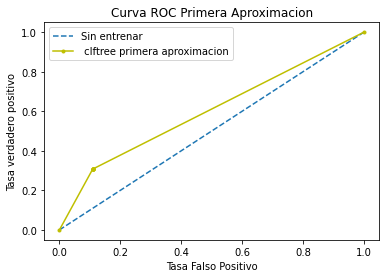

In [17]:
# Ploteamos Curva Roc
# Generamos un clasificador sin entrenar que asigna valor 0 a todo.
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clftree_first_aproach.predict_proba(X_test)[:, 1])
# Print
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Tree: ROC AUC=%.3f' % (lr_auc))
# We calculate the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clftree_first_aproach.predict_proba(X_test)[:, 1])
# Ploteamos
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clftree primera aproximacion' , color = "y")
# Axes labels
pyplot.title('Curva ROC Primera Aproximacion')
pyplot.xlabel('Tasa Falso Positivo')
pyplot.ylabel('Tasa verdadero positivo')
pyplot.legend()
plt.savefig(ruta +'/Financial-Product-Sales-Forecast-Model/Images/TREE Model - Roc Curve First Aproach.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## Construccion del Modelo

In [18]:
# Read Data Frame 
df_normalized = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Preprocessing/df_normalized.csv')

In [19]:
# Liberias Precargadas al inicio del notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [20]:
# Inputs y Target 
X = df_normalized.drop(['lp_seg_hogar'], axis = 1)
y= df_normalized['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6684992 (417812, 16)
Datos y = 417812 (417812,)


In [21]:
# Ajustamos nuestro set de Train y Test (80-20)
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [22]:
# Instanciamos el clasificador
clftree = DecisionTreeClassifier(class_weight ='balanced')

In [23]:
# Entrenamos el modelo
clftree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [24]:
# Predicciones
clftree.predict(X_test)

array([0., 0., 0., ..., 1., 0., 0.])

In [25]:
# Probabilidades
clftree.predict_proba(X_test)[:, 1]

array([0., 0., 0., ..., 1., 0., 0.])

Primeros resultados. Los resultados obtenidos en el entrenamiento y la prueba utilizando la métrica recall como medida muestran que el modelo no está generalizando bien. Hay una grave situación de sobreajuste que debo resolver. Lo confirmaremos mediante la Validación Cruzada. Para buscar soluciones y como siguiente paso utilizaremos Grid Search para buscar los mejores parámetros a utilizar con este modelo y obtener una métrica correcta


In [26]:
# Resultados con la métrica elegida "Recall" para ver si nuestro modelo generaliza bien.
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clftree.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clftree.predict(X_test)))

===========RECALL TRAIN============
recall = 0.9999781726109923
===========RECALL TEST=============
recall = 0.4253056884635832


## Técnicas de validación cruzada.  Métricas: Validación cruzada
Utilizamos la validación cruzada iterando 5 veces a lo largo del conjunto de entrenamiento.

- Apartamos 1/5 muestras.
- Entrenamos el modelo con las 4/5 muestras restantes.
- Mediremos con diferentes métricas el resultado obtenido en las muestras apartadas.
- Esto significa que hacemos 5 entrenamientos independientes.
- El resultado será la media de las 5 métricas anteriores.

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clftree,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clftree,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clftree,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.428789062042987, 0.4189141856392295, 0.4235119227889106)

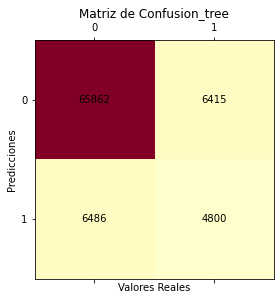

In [28]:
# Plot Matriz de Confusion
confusion_matrix_clftree = confusion_matrix(y_test,clftree.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(confusion_matrix_clftree, cmap=plt.cm.YlOrRd)
for i in range(confusion_matrix_clftree.shape[0]):
    for j in range(confusion_matrix_clftree.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix_clftree[i, j], va='center', ha='center')

plt.title('Matriz de Confusion_tree')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.tight_layout()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/TREE Model - Confusion_matrix_Tree.png', dpi=75,bbox_inches='tight')
plt.show()

In [29]:
# Resultados

accuracy_score_clftree = accuracy_score(y_test,clftree.predict(X_test))
precision_clftree  = precision_score(y_test,clftree.predict(X_test))
recall_clftree = recall_score(y_test,clftree.predict(X_test))
f1_score_clftree = f1_score(y_test,clftree.predict(X_test))
roc_auc_score_clftree = roc_auc_score(y_test,clftree.predict_proba(X_test)[:, 1])

print('==== knn RESULTADOS ====')
print('------------------------------------')
print('accuracy_score =', accuracy_score_clftree )
print('------------------------------------')
print('precision  =',precision_clftree)
print('------------------------------------')
print('recall =', recall_clftree)
print('------------------------------------')
print('f1_score =', f1_score_clftree)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_clftree)

==== knn RESULTADOS ====
------------------------------------
accuracy_score = 0.8456134892236995
------------------------------------
precision  = 0.4279982166740972
------------------------------------
recall = 0.4253056884635832
------------------------------------
f1_score = 0.4266477045464646
------------------------------------
roc_auc_score = 0.6683376260289059


## Ploteamos Curva Roc

Without training: ROC AUC=0.500
Tree: ROC AUC=0.668


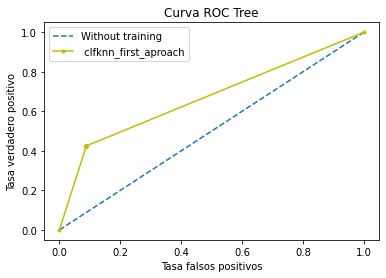

In [32]:
# Ploteamos Curva ROC
# Generamos un clasificador sin entrenar que asigna valor 0 a todo.
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clftree.predict_proba(X_test)[:, 1])
# Print
print('Without training: ROC AUC=%.3f' % (ns_auc))
print('Tree: ROC AUC=%.3f' % (lr_auc))
# Calculamos Curva ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clftree.predict_proba(X_test)[:, 1])
# Plot
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfknn_first_aproach' , color = "y")
# Axes labels
pyplot.title('Curva ROC Tree')
pyplot.xlabel('Tasa falsos positivos')
pyplot.ylabel('Tasa verdadero positivo')
pyplot.legend()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/TREE Model - Roc Curve_Tree.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## GridSearchCV  
Permite evaluar y seleccionar de forma sistemática los parámetros de un modelo. Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los segundos mediante validación cruzada.

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# Buscamos los mejores parametros
tree_grid_params = {       
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10],
    'min_samples_split' : [2,4,6],
    'min_samples_leaf' : [100,115,130]
    }

treegs = GridSearchCV(
        clftree,
        tree_grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )

In [35]:
# Entrenamos los parámetros y obtenemos una mejor puntuación, estimador y parámetros. 
treegs.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   49.2s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [100, 115, 130],
                         'min_samples_split': [2, 4, 6]},
             verbose=1)

In [36]:
# Mejores Estimadores
treegs.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=100)

In [37]:
# Mejores Parametros
treegs.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 100,
 'min_samples_split': 2}

## Hacemos el modelo con los mejores parametros

In [38]:
clftree_gs = DecisionTreeClassifier(criterion = 'gini', class_weight ='balanced',
                                 max_depth=8,min_samples_leaf=100,
                                 min_samples_split = 2)

In [39]:
clftree_gs.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=100)

In [40]:
clftree_gs.predict(X_test)

array([1., 0., 0., ..., 0., 1., 0.])

In [41]:
clftree_gs.predict_proba(X_test)[:, 1]

array([0.64702432, 0.11021766, 0.01140618, ..., 0.22212344, 0.71274191,
       0.00526482])

Evaluación del overfitting __ Los resultados obtenidos en el entrenamiento y en la prueba utilizando la métrica recall como medida muestran que el overfitting se ha resuelto utilizando mejores parámetros y se ha confirmado mediante la Validación Cruzada y diferentes promedios métricos. 


In [42]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clftree_gs.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clftree_gs.predict(X_test)))

===========RECALL TRAIN============
recall = 0.842951936089405
===========RECALL TEST=============
recall = 0.8446748183590289


## Metrics: Cross validation

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clftree_gs,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clftree_gs,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clftree_gs,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.32832560822935536, 0.8554816112084062, 0.4742642825160278)

### Confussion Matrix

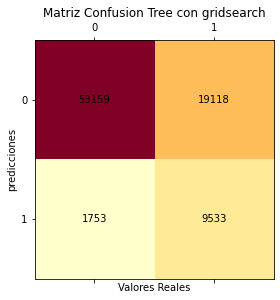

In [45]:
# Plot Confussion matrix 
confusion_matrix_gs = confusion_matrix(y_test,clftree_gs.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(confusion_matrix_gs, cmap=plt.cm.YlOrRd)
for i in range(confusion_matrix_gs.shape[0]):
    for j in range(confusion_matrix_gs.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix_gs[i, j], va='center', ha='center')

plt.title('Matriz Confusion Tree con gridsearch')
plt.xlabel('Valores Reales')
plt.ylabel('predicciones')
plt.tight_layout()
plt.savefig(ruta + '/Financial-Product-Sales-Forecast-Model/Images/TREE Model - Confusion_matrix_Tree_GridSearch.png', dpi=75,bbox_inches='tight')
plt.show()


In [46]:
# Resultados

accuracy_score_gs = accuracy_score(y_test,clftree_gs.predict(X_test))
precision_gs  = precision_score(y_test,clftree_gs.predict(X_test))
recall_gs = recall_score(y_test,clftree_gs.predict(X_test))
f1_score_gs = f1_score(y_test,clftree_gs.predict(X_test))
roc_auc_score_gs = roc_auc_score(y_test,clftree_gs.predict_proba(X_test)[:, 1])

print('==== RESULTADOS TREE CON GRIDSEARCH ====')
print('------------------------------------')
print('accuracy_score =', accuracy_score_gs )
print('------------------------------------')
print('precision  =',precision_gs)
print('------------------------------------')
print('recall =', recall_gs)
print('------------------------------------')
print('f1_score =', f1_score_gs)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_gs)

==== RESULTADOS TREE CON GRIDSEARCH ====
------------------------------------
accuracy_score = 0.7502363486231944
------------------------------------
precision  = 0.3327283515409584
------------------------------------
recall = 0.8446748183590289
------------------------------------
f1_score = 0.477401908005108
------------------------------------
roc_auc_score = 0.8694661371681359


Without training: ROC AUC=0.500
Knn: ROC AUC=0.869


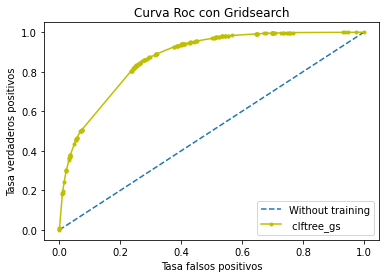

In [47]:
# Ploteamos Curva ROC
# Generamos un clasificador sin entrenar que asigna valor 0 a todo.
no_train = [0 for _ in range(len(X_test))]
# Calculamos AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clftree_gs.predict_proba(X_test)[:, 1])
# Print
print('Without training: ROC AUC=%.3f' % (ns_auc))
print('Knn: ROC AUC=%.3f' % (lr_auc))
# Calculamos CCurva ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clftree_gs.predict_proba(X_test)[:, 1])
# Plot
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clftree_gs' , color = "y")
# Axes labels
pyplot.title('Curva Roc con Gridsearch')
pyplot.xlabel('Tasa falsos positivos')
pyplot.ylabel('Tasa verdaderos positivos')
pyplot.legend()
plt.savefig(ruta +'/Financial-Product-Sales-Forecast-Model/Images/TREE Model - Roc Curve with Gridsearch.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

In [48]:
print('Results 1rst aproach: RECALL %f, AUC %f' %(recall_first_aproach, roc_auc_score_first_aproach))
print('Results model: RECALL %f, AUC %f' %(recall_clftree, roc_auc_score_clftree))
print('Results model with gridsearch: RECALL %f, AUC %f' %(recall_gs, roc_auc_score_gs))

Results 1rst aproach: RECALL 0.307085, AUC 0.599164
Results model: RECALL 0.425306, AUC 0.668338
Results model with gridsearch: RECALL 0.844675, AUC 0.869466


## Model  Conclusions
Las métricas elegidas__ para evaluar nuestro modelo de clasificación de Árbol de Decisión son Recall y AUC - Curva Roc..

Comenzamos nuestro modelo con una primera aproximación obteniendo resultados muy mejorables. Recall 0,30__ La base de datos utilizada es la original sin ningún tipo de preprocesamiento.

Evolucionamos nuestro modelo. Utilizamos como base de datos df_normalized ya preprocesada en nuestro bloque de preprocesamiento. (Adaptado, aplicado Label Encoder y Standar Scaler).

Dado que nuestro Target está muy desequilibrado con un 87% de No y un 13% de Sí, se ha utilizado el parámetro 'class_weight = 'balanced' al principio del modelo.

Podemos ver que nuestro conjunto de entrenamiento no generaliza bien. Hay una gran diferencia entre los resultados obtenidos en Test y Train. 0,99 Tren - 0,42 Prueba. Podemos en este caso confirmar la existencia de overfitting__ Lo comprobamos mediante la Validación Cruzada obteniendo las medias de las diferentes métricas.

Necesitamos mejorar el modelo y para ello utilizamos GridSearch para buscar soluciones y mejores parámetros. Una vez obtenido, volvemos a entrenar y obtenemos de nuevo las métricas Recall 0.87 Train - 0.86 Test para confirmar entre otras cosas que hemos conseguido solucionar el overfitting y que nuestro modelo ha conseguido generalizar bien. Confirmamos con la Validación Cruzada obteniendo las medias de las diferentes métricas con 5 validaciones.

Las métricas finalmente elegidas son Reccal 0,84 y AUC 0,86 que consideramos adecuadas para la explicación de nuestro modelo.

En la diagonal de aciertos tenemos 53159 y 9533. En nuestro modelo prima la detección de los clientes que sí quieren contratar el seguro. Necesitamos obtener una buena tasa de verdaderos positivos. Recordemos que nuestras métricas objetivo son Recall y AUC. Si detectamos a los clientes que probablemente vayan a contratar un seguro de hogar, podremos trabajar de forma más directa. Todo ello con el objetivo de optimizar el tiempo y la eficiencia comercial. El resultado de Recall obtenido es óptimo, con un 84% y un 87% en AUC.

Nos faltan, entre otras muchas, variables y datos como los ingresos del cliente, los hijos, el tipo de trabajo, el salario real en euros obtenido, el lugar de residencia... etc.

Seguiremos buscando con otros modelos mejores resultados con las variables disponibles.


